# Simplex Algorithm

> “The simplex method is a method for solving problems in linear programming. This method, invented by George Dantzig in 1947, tests adjacent vertices of the feasible set (which is a polytope) in sequence so that at each new vertex the objective function improves or is unchanged.” (Wolfram MathWorld)

The underlying observation is that our linear program bears some resemblance with a linear equation system:

$\mathbf{x} \leq \mathbf{b} \leftrightarrow \mathbf{x} +  \mathbf{s} =  \mathbf{b} \text{ with }  \mathbf{s} \geq 0$

If there are n+m variables in a system of m equations (where n>m),
by setting n variables to zero we can use the remaining m variables and solve the equations.

## Identifying solution candidates: Basic Solution
For LP problems in normal form with 𝑚 linear inequalities with 𝑛 variables a basic solution is obtained by setting any 𝑛  of the 𝑛+𝑚 variables to zero and solving for the remaining 𝑚 variables
the 𝑚 non-zero variables are called _basic variables_ the remaining 𝑛 zero-valued variables are called _non-basic variables_. In general, there are at most $\binom{m+n}{n}$ basic solutions (some may not feasible).

**In our toy factory example:**
* Heuristic solution: 40 soldiers, 20 trains, 20 units of carpenting leftover (0 leftover finishing, 0 leftover production allowance for soldiers)
* No leftover carpenting, no leftover finishing
* No leftover carpenting, no leftover allowance
* Produce nothing
* produce no soldiers with no carpenting left
* produce no soldiers with no finishing left
* produce no soldiers with no maxsoldiers left
* produce no trains, no finishing left
* produce no trains, no carpenting left
* produce no trains, no maxsoldiers left …

There are ten possible basic solutions, some are clearly not optimal (doing nothing) or infeasible (e.g., produce no soldiers with no maxsoldiers left). We could in principle solve the linear equation system for each configuration
BUT: Computational cost would then grow exponentially in the number of variables.

## The Simplex Algorithm

We need a more efficient way to fix basic variables - this boils down to looking at as few solution candidates as possible. Obvious improvements over the naive approach are taking into account profitability (improvement of objective) and feasibility of alternative basic solutions. This is the basic idea of the Simplex algorithm.

The simplex procedure constantly improves the current solution until an optimum is found. The high level flowchart is presented below:

<img src="https://user-images.githubusercontent.com/493486/146375891-4c3e062d-77ed-47ea-9159-df8f35106adb.png" alt="Drawing" style="width: 300px;"/>

After the setting up the initial tableau the algorithm enters a loop conditional on the current solution being not optimal. Each algorithm iteration then proceeds by determining the pivot column (new basic variable to be included) and row (current basic variable to be removed) such that the the greatest improvement of the objective value is realized. The indidivudal steps are as follows:

* Build tableau: Convert the LP problem to standard form by transforming the objective function and constraints to equality.
* Check optimality: Check if all values in the bottom row are none-negative. If this is the case, the optimal solution is found. If not, continue to the next step.
* Find pivot column: Determine the pivot column by locating the most negative value in the bottom row.
* Find pivot row: Determine the pivot row by dividing the right-hand side values of the constraints by the corresponding value in the pivot column. Select the smallest positive value.
* Pivoting: Transform the pivot element to 1 and modify the matrix such that all other the values in the pivot column become 0.

In the following we will provide detailed information (and an implementation example) on the different steps:

## Setting up the initial tableau

We are given a linear program in standard form:

$\max \mathbf{c}^T \mathbf{x}$   s.t.   $A\mathbf{x}\leq \mathbf{b}$,  $\mathbf{x} \geq 0$

### Preparation
We then perform some straightforward manipulations to turn this system of inequalities into a linear equation system:

* Transform objective function to equation by introducing a variable $f(\mathbf{x})=\mathbf{c}^T \mathbf{x}$ for the objective value: $f(\mathbf{x}) - \mathbf{c}^T \mathbf{x} = 0$
* Transform constraints to equations by introducing positive slack variables:

$a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n \leq b_1 \leftrightarrow a_{11}x_1 + a_{12}x_2 + ... + a_{1n}x_n + s_1 = b_1$

$a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n \leq b_2 \leftrightarrow a_{21}x_1 + a_{22}x_2 + ... + a_{2n}x_n + s_2 = b_2$

$\vdots$

$a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n \leq b_m \leftrightarrow a_{m1}x_1 + a_{m2}x_2 + ... + a_{mn}x_n + s_m = b_m$

### Building the tableau
The simplex tableau follows from these manipulations in a straightforward manner: Each row corresponds to one equation, the bottom row corresponds to the objective function. The first column is a label for the row, the subseuqent $n$ columns are labelled with the corresponding $x_i$ values, the next $m$ columns are labelled with the corresponding slack variables $x_j$ and the last column is the right-hand side $b$. In the initial tableau we assume all slack variables to be basic and they are labelled accordingly with $s_j$. Below this procedure is illustrated for an example with two variables and two constraints:

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | b     |
|-------|------------|------------|---------|---------|-------|
| $$s_1$$ | $$a_{11}$$ | $$a_{12}$$ | 1     | 0     | $$b_1$$ |
| $$s_2$$ | $$a_{21}$$ | $$a_{22}$$ | 0     | 1     | $$b_2$$ |
|         | $$-c_1$$    | $$-c_2$$    | 0     | 0     | 0       |

And here is the initial tableau for our toy factory problem:

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | $$s_3$$ | b     |
|-------|------------|------------|---------|---------|---------|-------|
| $$s_1$$ | 1 | 1| 1     | 0     | 0     | $$80$$ |
| $$s_2$$ | 2 |1 | 0     | 1     | 0     | $$100$$ |
| $$s_3$$ | 1 |0 | 0     | 0    | 1     | $$40$$ |
|         | $$-3$$    | $$-2$$    | 0     | 0     | 0       | 0       |

### Some remarks on the tableau
* The bottom right value is the objective value of the current solution (here 0)
* For basic variables, the columns are all zero except for the row with the corresponding variable label (compare $s_1$, $s_2$, $s_3$)
* For a solution to be feasible the b column must be non-negative


### Python implementation
This is easily implemented in Python using list operations:

In [68]:
# general setup, definition of problem (toy factory)
import numpy as np
import math

c = [3,2,0,0,0]
A = [
    [1, 1,1,0,0],
    [ 2, 1,0,1,0],
    [ 1,0,0,0,1]]
b = [80,100,40]

In [69]:
# function to create a simplex tableau for a given objective coefficient vector, constraint matrix and right hand side
def to_tableau(c, A, b):
    xb = [eq + [x] for eq, x in zip(A, b)]
    z = [i * -1 for i in c] + [0]
    return xb + [z]

In [70]:
# example tableau
to_tableau(c, A, b)

[[1, 1, 1, 0, 0, 80],
 [2, 1, 0, 1, 0, 100],
 [1, 0, 0, 0, 1, 40],
 [-3, -2, 0, 0, 0, 0]]

## Check optimality

For non-basic variables, the bottom row in the tableau indicates how much the objective function can be increased by making this variable a basic variable. Note that given our $f(\mathbf{x}) - \mathbf{c}^T \mathbf{x} = 0$ setup a negative value indicates a possible increase of the objective value.

### Procedure
In a maximization context we can then easily verify optimality by checking whether or not there are still negative values remaining. In our case this is clearly the case as the objective coefficient of the $x_1$ and $x_2$ columns are -3 and -2. Our current solution is hence not optimal but can be improved.

### Python implementation
A possible Python implementations looks as follows and yields the correct result for the optimality check:

In [71]:
# function to check whether or not a given simplex tableau can be improved (is not optimal)
def can_be_improved(tableau):
    z = tableau[-1]
    return any(x < 0 for x in z[:-1])
    restrictions = []
    for eq in tableau[:-1]:
        el = eq[column]
        restrictions.append(math.inf if el <= 0 else eq[-1] / el)

    row = restrictions.index(min(restrictions))
    return row, column

In [72]:
# test on our tableau
can_be_improved(to_tableau(c, A, b))

True

## Determine pivot element

### Determine pivot column
Given a sub-optimal tableau the next simplex iteration seeks to improve the objective value. To this end we need to include a non-basic variable in the base which has a negative objective coefficient. In our example this is the case for both non-basic variables. In principle you could use any in such a setting - by convention we will take a greedy approach and pick the most negative one resulting in the greatest imminent improvement. Note that there is no garuantee that this is the best choice in general. However, it has proven to be a very good choice across many problem instances. In our example we choose the $x_1$ column with the most negative value -3.

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | $$s_3$$ | b     |
|-------|------------|------------|---------|---------|---------|-------|
| $$s_1$$ | **1** | 1| 1     | 0     | 0     | 80 |
| $$s_2$$ | **2** |1 | 0     | 1     | 0     | 100 |
| $$s_3$$ | **1** |0 | 0     | 0    | 1     | 40 |
|         | **-3**    | -2    | 0     | 0     | 0       | 0       |

### Determine pivot row
Having identified the most promiment new basic variable, we need to identify the current basic variable which will be removed from the base in exchange. To this end, we compare the new variable's ''consumption'' of the constraints. We do so by dividing the b column by the values from the pivot column. This essentially yields a measure of how many units of the new basic variable can be afforded. The lowest b-divided-by-pivot value is the bottleneck and this row will be the pivot row. The combination of pivot column and pivot row is the pivot element. In our example this is the $s_3$ row with an allowable increase of 40. The interpretation is as follows: We can increase the number of toy soldiers ($x_1$) produced by at most 40 because then the max output constraint becomes binding. Note as soon as this constraint is binding the corresponding slack variable $s_3$ is zero which corresponds to a non-basic variable as intended!

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | $$s_3$$ | b     |b/pivot|
|-------|------------|------------|---------|---------|---------|-------|-------|
| $$s_1$$ | **1** | 1| 1     | 0     | 0     | 80$|80|
| $$s_2$$ | **2** |1 | 0     | 1     | 0     | 100 |50
| $$s_3$$ | **1** |**0** | **0**    | **0**    | **1**     | **40** |**40**|
|         | **-3**    | -2    | 0     | 0     | 0       | 0       | |

### Python implementation
The Python implementation first finds the column. Subsequently, the restrictions are checked and the most restrictive is identified. The solution (2,0) uses zero indexing and essentially means third row, first column which corresponds to $s_3$ and $x_1$.

In [73]:
# function to determine the pivot element location
def get_pivot_position(tableau):
    z = tableau[-1]
    column = next(i for i, x in enumerate(z[:-1]) if x < 0)
    
    restrictions = []
    for eq in tableau[:-1]:
        el = eq[column]
        restrictions.append(math.inf if el <= 0 else eq[-1] / el)

    row = restrictions.index(min(restrictions))
    return row, column

In [74]:
# test on our example
get_pivot_position(to_tableau(c, A, b))

(2, 0)

## Pivoting
Having decided which variables' roles are swapped we need to make sure that we obtain a correct new simplex tableau. As noted before a proper simplex tableau can be identified by the basic variable columns featuring a single one and else only zeroes. We apply appropriate matrix manipulations to achieve this target:

* Obtaining the 1 is simple as the location is the pivot element. If the pivot element is not 1 we can divide the whole row by the current value and obtain a pivot row with a 1-entry in the pivot column.
* The zeroes are subsequently obtained by adding or subtracting the appropriate multiples of the pivot row from the other rows such that the pivot column takes zero values.

### Example

In our example the pivot element was one so the first step is not necessary. The other steps proceed as follows:

* Transform row 1 by subtracting row 3
* Transform row 2 by subtracting 2 times row 3
* Transform row 4 by adding 3 times row 3

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | $$s_3$$ | b     |
|-------|------------|------------|---------|---------|---------|-------|
| $$s_1$$ | 0 | 1| 1     | 0     | -1     | 40 |
| $$s_2$$ | 0 |1 | 0     | 1     | -2    | 20 |
| $$x_1$$ | 1 |0 | 0     | 0    | 1     | 40 |
|         | 0    | -2    | 0     | 0     | 3       | 120       |

Some remarks on the new tableau:

* The new solution is to produce 40 soldiers, have 40 hours of carpentry left over and 20 hours of finishing
* The objective value has increased from 0 to 120
* The soluton is not optimal, the objective coefficient of the $x_2$ column is still negative $\rightarrow$ next iteration

### Implementation
The python implementation leverages some clever numpy calls and is surprisingly compact.

In [75]:
# function to perform a pivot step on a tableau for a given pivot element
def pivot_step(tableau, pivot_position):
    new_tableau = [[] for eq in tableau]
    
    i, j = pivot_position
    pivot_value = tableau[i][j]
    new_tableau[i] = np.array(tableau[i]) / pivot_value
    
    for eq_i, eq in enumerate(tableau):
        if eq_i != i:
            multiplier = np.array(new_tableau[i]) * tableau[eq_i][j]
            new_tableau[eq_i] = np.array(tableau[eq_i]) - multiplier
   
    return new_tableau

In [76]:
tableau = to_tableau(c, A, b)
pivot_step(tableau, get_pivot_position(tableau))

[array([ 0.,  1.,  1.,  0., -1., 40.]),
 array([ 0.,  1.,  0.,  1., -2., 20.]),
 array([ 1.,  0.,  0.,  0.,  1., 40.]),
 array([  0.,  -2.,   0.,   0.,   3., 120.])]

## Putting it all together
We have now all the elements together and can instantiate the control flow illustrated above. Clearly, for manual calculation frequent pivoting can become fairly tedious. But the python program is super straightforward: Leveraging the *can_be_improved* function we can keep identifying the next pivot element and perform the pivot operations subsequently. For illustration purposes we first look at a verbose function which reports in-between tableaus and stops on the final tableau:

In [91]:
# simplex algorithm with intermediate results and pivot elements
def simplexVerbose(c, A, b):
    tableau = to_tableau(c, A, b)
    for i in tableau:
        print(i)
        
    while can_be_improved(tableau):
        print(" ")
        pivot_position = get_pivot_position(tableau)
        print(pivot_position)
        print(" ")
        tableau = pivot_step(tableau, pivot_position)
        for i in tableau:
            print(i)

In [90]:
simplexVerbose(c, A, b)

[1, 1, 1, 0, 0, 80]
[2, 1, 0, 1, 0, 100]
[1, 0, 0, 0, 1, 40]
[-3, -2, 0, 0, 0, 0]
 
(2, 0)
 
[ 0.  1.  1.  0. -1. 40.]
[ 0.  1.  0.  1. -2. 20.]
[ 1.  0.  0.  0.  1. 40.]
[  0.  -2.   0.   0.   3. 120.]
 
(1, 1)
 
[ 0.  0.  1. -1.  1. 20.]
[ 0.  1.  0.  1. -2. 20.]
[ 1.  0.  0.  0.  1. 40.]
[  0.   0.   0.   2.  -1. 160.]
 
(0, 4)
 
[ 0.  0.  1. -1.  1. 20.]
[ 0.  1.  2. -1.  0. 60.]
[ 1.  0. -1.  1.  0. 20.]
[  0.   0.   1.   1.   0. 180.]


After three iterations we obtain the final tableau which can no longer be improved (everything positive in the bottom row). Note that in this condesed Python representation we can no longer directly see the labels of the rows. However, by looking at the columns with only zeroes and one 1 we can re-identify the basic variables and obtain the following rich representation of the final tableau:

|       | $$x_1$$    | $$x_2$$    | $$s_1$$ | $$s_2$$ | $$s_3$$ | b     |
|-------|------------|------------|---------|---------|---------|-------|
| $$s_3$$ | 0 | 0| 1     | -1     | 1     | 20 |
| $$x_2$$ | 0 |1 | 2     | -1     | 0    | 60 |
| $$x_1$$ | 1 |0 | -1     | 1    | 0     | 20 |
|         | 0    | 0    | 1     | 1     | 0       | 180       |

We can make the following interpretations:

* The optimal objective value is 180
* In optimum we produce 60 toy trains and 20 soldiers (both basic variables)
* The maximum soldier allowance is not binding and there is a positive slack of 20 which means $s_3$ is not basic.

Below is a purely result-focused implementation of the simplex algorithm. To use it more informatively it is sidelined by a get solution function which provides a proper representation of the result.

In [93]:
# helper to identify basic columns
def is_basic(column):
    return sum(column) == 1 and len([c for c in column if c == 0]) == len(column) - 1

# helper to retrieve solution from tableau
def get_solution(tableau):
    columns = np.array(tableau).T
    solutions = []
    for column in columns[:-1]:
        solution = 0
        if is_basic(column):
            one_index = column.tolist().index(1)
            solution = columns[-1][one_index]
        solutions.append(solution)
        
    return solutions

In [92]:
# simplex algorithm only providing final solution
def simplex(c, A, b):
    tableau = to_tableau(c, A, b)

    while can_be_improved(tableau):
        pivot_position = get_pivot_position(tableau)
        tableau = pivot_step(tableau, pivot_position)

    return get_solution(tableau)

In [94]:
simplex(c, A, b)

[20.0, 60.0, 0, 0, 20.0]

In [9]:
def get_objective_function_value(tableau):
    return -tableau[-1][-1]

In [16]:
def simplex_with_visualization(c, A, b, halfspaces, feasible_point):
    tableau = to_tableau(c, A, b)

    zs = [get_objective_function_value(tableau)]
    solutions = [get_solution(tableau)]
    while can_be_improved(tableau):
        pivot_position = get_pivot_position(tableau)
        tableau = pivot_step(tableau, pivot_position)
        solutions.append(get_solution(tableau))
        zs.append(get_objective_function_value(tableau))
    
    points = [v[:2] for v in solutions]
    xlim = (-1, 2*max([p[0] for p in points]) + 1)
    ylim = (-1, 2*max([p[1] for p in points]) + 1)
    render_inequalities(halfspaces, feasible_point, xlim, ylim)

    i=1
    for start, end in zip(points[:-1], points[1:]):
        


  
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        if dx >= 0 and dy >= 0:
            plt.arrow(
                start[0],
                start[1],
                dx,
                dy,
                width=0.1,
                length_includes_head=True,
                color='#1abc9c'
            )
            
    
    for p in points:
        plt.plot(p[0],p[1], 'o', color="#e67e22")
        plt.text(p[0],p[1], str(i), fontsize=20)
        i = i+1


            
            
    plt.show()
    
    steps = range(len(zs))
    plt.plot(steps, zs, color="#AA0000")
    plt.xticks(steps)
    plt.xlabel('iterations')
    plt.ylabel('objective function value')
    
    
    return get_solution(tableau)


In [20]:
from scipy.spatial import HalfspaceIntersection, ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def render_inequalities(halfspaces, feasible_point, xlim, ylim):
    hs = HalfspaceIntersection(np.array(halfspaces), np.array(feasible_point))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, aspect='equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 40)

    for h in halfspaces:
        if h[1]== 0:
            ax.axvline(-h[2]/h[0], color="#2c3e50")
        else:
            ax.plot(x, (-h[2]-h[0]*x)/h[1], color="#2c3e50")
    x, y = zip(*hs.intersections)
    points = list(zip(x, y))
    convex_hull = ConvexHull(points)
    polygon = Polygon([points[v] for v in convex_hull.vertices], color="#34495e")
    ax.add_patch(polygon)

    #ax.plot(x, y, 'o', color="#e67e22")

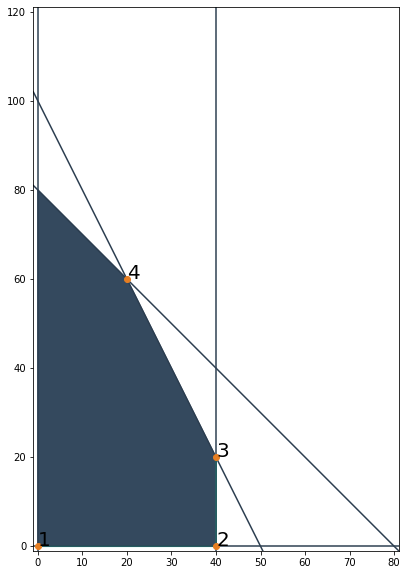

[20.0, 60.0, 0, 0, 20.0]

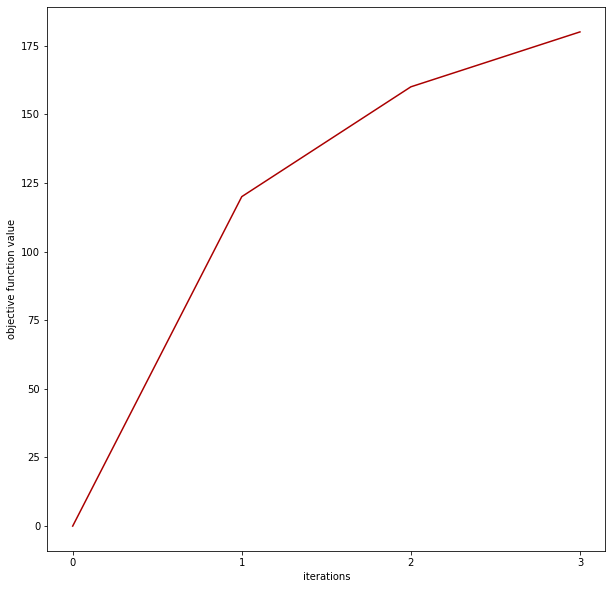

In [21]:
plt.rcParams["figure.figsize"] = (10,10)

halfspaces = [
    [-1, 0., 0.],    # x₁ ≥ 0
    [0., -1., 0.],   # x₂ ≥ 0
    [1, 1, -80.], # 4x₂ - x₁ ≤ 13
    [2., 1., -100.],   # x₂ + 2x₁ ≤ 10
    [1., 0., -40.]   # x₂ + 2x₁ ≤ 10
]

feasible_point = [0.5, 0.5]

xlim = (-1, 100)
ylim = (-1, 100)

simplex_with_visualization(c,A,b,halfspaces, feasible_point)